In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt 

iris_data = pd.read_csv("iris.csv")

#Renaming column names for better presentation of dataset
new_column = {
    "SepalLengthCm" : "Sepal Length",
    "SepalWidthCm" : "Sepal Width",
    "PetalLengthCm" : "Petal Length", 
    "PetalWidthCm" : "Petal Width"
}

iris_data.rename(columns = new_column, inplace=True)

print("The DataFrame, Iris:  ")
print(iris_data)

The DataFrame, Iris:  
      Id  Sepal Length  Sepal Width  Petal Length  Petal Width         Species
0      1           5.1          3.5           1.4          0.2     Iris-setosa
1      2           4.9          3.0           1.4          0.2     Iris-setosa
2      3           4.7          3.2           1.3          0.2     Iris-setosa
3      4           4.6          3.1           1.5          0.2     Iris-setosa
4      5           5.0          3.6           1.4          0.2     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146           6.7          3.0           5.2          2.3  Iris-virginica
146  147           6.3          2.5           5.0          1.9  Iris-virginica
147  148           6.5          3.0           5.2          2.0  Iris-virginica
148  149           6.2          3.4           5.4          2.3  Iris-virginica
149  150           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 6 columns]


In [2]:
print("Columns of Iris Data: ")
print(iris_data.columns) 

Columns of Iris Data: 
Index(['Id', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')


In [3]:
mean_data = iris_data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].mean()
print("Mean of each Feature: ")
print(mean_data)

Mean of each Feature: 
Sepal Length    5.843333
Sepal Width     3.054000
Petal Length    3.758667
Petal Width     1.198667
dtype: float64


In [4]:
median_data = iris_data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].median()
print("Median of each Feature: ")
print(median_data)

Median of each Feature: 
Sepal Length    5.80
Sepal Width     3.00
Petal Length    4.35
Petal Width     1.30
dtype: float64


In [5]:
mode_data = iris_data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].mode()
print("Mode of each Feature: ")
print(mode_data)

Mode of each Feature: 
   Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.0          3.0           1.5          0.2


In [6]:
standard_deviation_data = iris_data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].std()
print("Standard Deviation of each Feature: ")
print(standard_deviation_data)

Standard Deviation of each Feature: 
Sepal Length    0.828066
Sepal Width     0.433594
Petal Length    1.764420
Petal Width     0.763161
dtype: float64


In [7]:
#confidence interval 
for i in range(4):
    
    select_feature = iris_data.iloc[:, i]
    sample_mean = np.mean(select_feature)
    stad_error_sam = sts.sem(select_feature)
    confidence_level = 0.95
    conf_interval = sts.t.interval(confidence_level, len(select_feature) - 1, loc = sample_mean, scale = stad_error_sam)
    column = iris_data.columns[1:5]
    print(f"The bounds of Confidence Interval for {column[i]} feature is : ")
    print("Upper Bounds: ", conf_interval[0])
    print("Lower Bounds: ", conf_interval[1])
    print("\n")

The bounds of Confidence Interval for Sepal Length feature is : 
Upper Bounds:  68.49048955684367
Lower Bounds:  82.50951044315633


The bounds of Confidence Interval for Sepal Width feature is : 
Upper Bounds:  5.709732481507366
Lower Bounds:  5.976934185159301


The bounds of Confidence Interval for Petal Length feature is : 
Upper Bounds:  2.9840435467800845
Lower Bounds:  3.123956453219916


The bounds of Confidence Interval for Petal Width feature is : 
Upper Bounds:  3.473993663967714
Lower Bounds:  4.0433396693656185




In [8]:
#Standard error for each feature:
Length_sample = len(iris_data)
std_error =standard_deviation_data / (np.sqrt(Length_sample))
print("Standard Error: ")
print(std_error)
print("\n")

Standard Error: 
Sepal Length    0.067611
Sepal Width     0.035403
Petal Length    0.144064
Petal Width     0.062312
dtype: float64




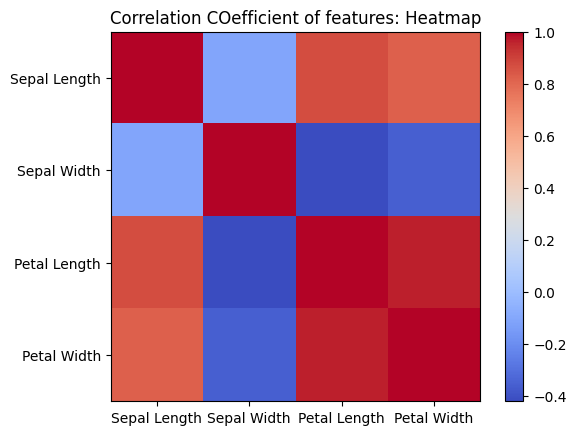

In [9]:
# b. Compute correlation coefficients between each pair of features and plot heatmap

correlation_matrix =  iris_data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']].corr()
label = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
size_ln = len(label)
plt.imshow(correlation_matrix, cmap="coolwarm")
plt.colorbar()
plt.xticks(np.arange(size_ln), label)
plt.yticks(np.arange(size_ln), label)  # Added y-axis labels
plt.title("Correlation COefficient of features: Heatmap")
plt.show()
print("\n")

In [10]:
#Covariance
sepal_data = iris_data["Sepal Length"]
petal_data = iris_data["Petal Length"]
covariance_data = sepal_data.cov(petal_data)
print("The Covariance of the lengths of sepal and petal is :", covariance_data)
 

The Covariance of the lengths of sepal and petal is : 1.2736823266219242


In [11]:
#crosstab
cont_table = pd.crosstab(index=iris_data["Sepal Length"], columns="count")

# Splited the table into two halves for better visulaization, 
half = len(cont_table) // 2 + len(cont_table) % 2  # If odd, first half will be bigger
left = cont_table.iloc[:half]
right = cont_table.iloc[half:]

# Combined them side by side
combined = pd.concat([left.reset_index(), right.reset_index()], axis=1)

# Renamed columns for clarity
combined.columns = ["Sepal Length", "Count", "Sepal Length", "Count"]

print(combined.to_string(index=False))


 Sepal Length  Count  Sepal Length  Count
          4.3      1           6.1    6.0
          4.4      3           6.2    4.0
          4.5      1           6.3    9.0
          4.6      4           6.4    7.0
          4.7      2           6.5    5.0
          4.8      5           6.6    2.0
          4.9      6           6.7    8.0
          5.0     10           6.8    3.0
          5.1      9           6.9    4.0
          5.2      4           7.0    1.0
          5.3      1           7.1    1.0
          5.4      6           7.2    3.0
          5.5      7           7.3    1.0
          5.6      6           7.4    1.0
          5.7      8           7.6    1.0
          5.8      7           7.7    4.0
          5.9      3           7.9    1.0
          6.0      6           NaN    NaN


Statistical Summary:
                        mean  median  mode       std
sepal length (cm)  5.843333    5.80   5.0  0.828066
sepal width (cm)   3.057333    3.00   3.0  0.435866
petal length (cm)  3.758000    4.35   1.4  1.765298
petal width (cm)   1.199333    1.30   0.2  0.762238
Confidence Intervals:
           sepal length (cm)  sepal width (cm)  petal length (cm)  \
Lower CI           5.709732          2.987010           3.473185   
Upper CI           5.976934          3.127656           4.042815   

          petal width (cm)  
Lower CI          1.076353  
Upper CI          1.322313  
Standard Errors:
                 sepal length (cm)  sepal width (cm)  petal length (cm)  \
Standard Error           0.067611          0.035588           0.144136   

                petal width (cm)  
Standard Error          0.062236  


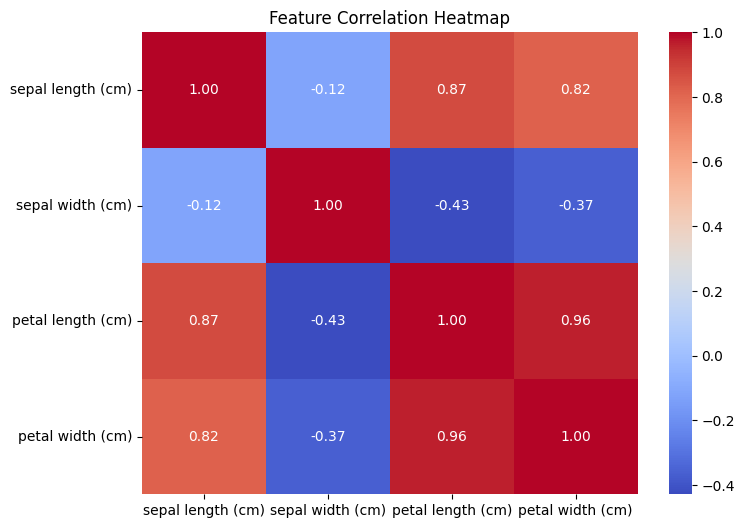

Covariance between Sepal Length and Petal Length: 1.2743154362416107
Contingency Table:
 species   0   1   2
count    50  50  50


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# a. Compute statistical measures for each feature
mean_values = data.iloc[:, :-1].mean()
median_values = data.iloc[:, :-1].median()
std_values = data.iloc[:, :-1].std()
mode_values = data.iloc[:, :-1].mode().iloc[0]

# Create a DataFrame for statistical summary
stats_summary = pd.DataFrame({'mean': mean_values, 'median': median_values, 'mode': mode_values, 'std': std_values})

# Compute confidence interval and standard error
confidence_interval = {}  # Dictionary to store confidence intervals
standard_error = {}  # Dictionary to store standard errors
for col in data.columns[:-1]:
    se = stats.sem(data[col])
    standard_error[col] = se
    ci = stats.t.interval(0.95, len(data[col])-1, loc=np.mean(data[col]), scale=se)
    confidence_interval[col] = ci

# Convert to DataFrame
ci_df = pd.DataFrame(confidence_interval, index=['Lower CI', 'Upper CI'])
se_df = pd.DataFrame(standard_error, index=['Standard Error'])

print("Statistical Summary:\n", stats_summary)
print("Confidence Intervals:\n", ci_df)
print("Standard Errors:\n", se_df)

# b. Compute correlation matrix and plot heatmap
correlation_matrix = data.iloc[:, :-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# c. Compute covariance between sepal length and petal length
covariance = np.cov(data['sepal length (cm)'], data['petal length (cm)'])[0, 1]
print("Covariance between Sepal Length and Petal Length:", covariance)

# d. Build contingency table for class feature
contingency_table = data['species'].value_counts().to_frame().T
print("Contingency Table:\n", contingency_table)
